# 🌱 Sustainable Agriculture Project - Week 2 (Combined Week1 + Week2 Work)
### Author: KISHORE B

This notebook combines:
- **Week 1** → Data loading, cleaning, exploratory data analysis (EDA)
- **Week 2** → Model training (Logistic Regression, Decision Tree, Random Forest)

Dataset: Crop Recommendation Dataset (Kaggle)

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Crop_recommendation.csv")   # ensure dataset is in the same folder

print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())

Dataset Shape: (2200, 8)
First 5 rows:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
# Step 3: Data Understanding & Cleaning
print("\nMissing values:\n", df.isnull().sum())
print("\nDataset Info:")
print(df.info())


Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


C:\Users\kisho\AppData\Local\Temp\ipykernel_10012\3717297200.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")


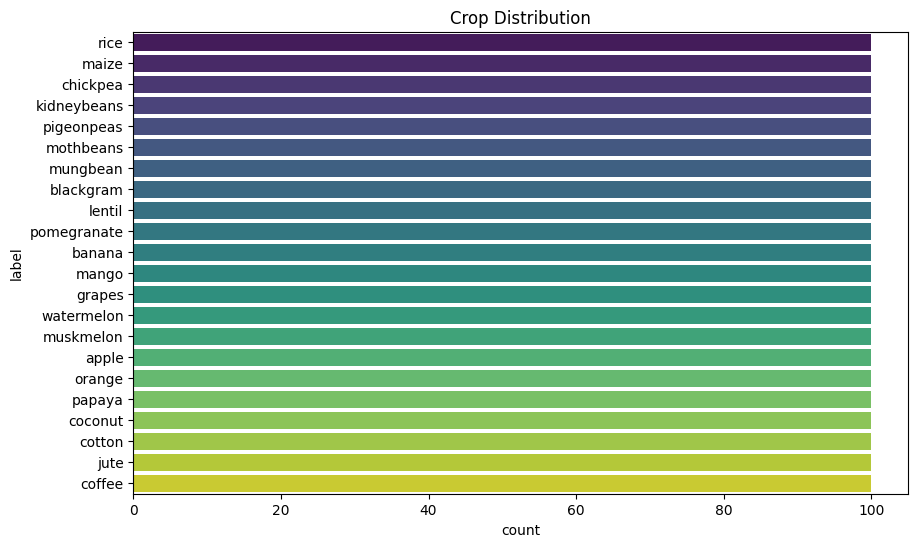

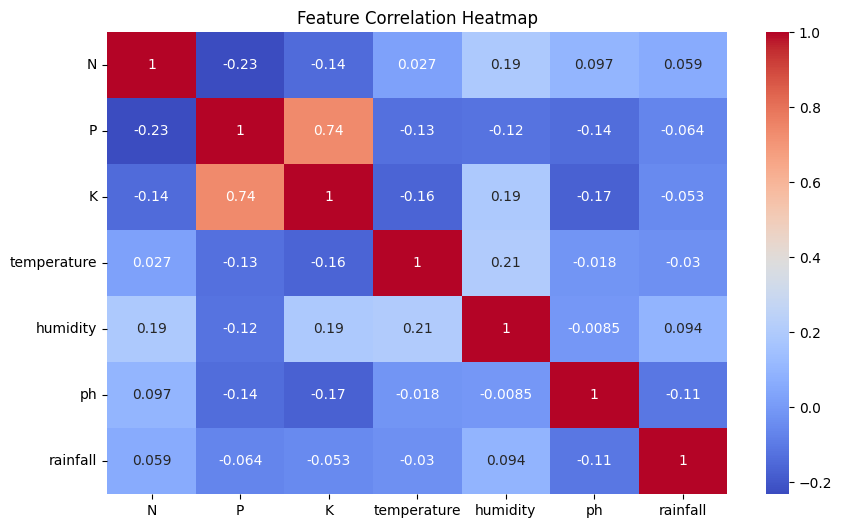

In [5]:
# Step 4: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count plot for 'label' column
plt.figure(figsize=(10,6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.title("Crop Distribution")
plt.show()

# Heatmap for numeric columns only
numeric_df = df.select_dtypes(include=np.number)  # select only numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Step 5: Encode Target Variable
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [7]:
# Step 6: Split Data
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 7: Train & Evaluate Models

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\n🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

C:\Users\kisho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression Accuracy: 0.9522727272727273
🔹 Decision Tree Accuracy: 0.9863636363636363
🔹 Random Forest Accuracy: 0.9931818181818182



📊 Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

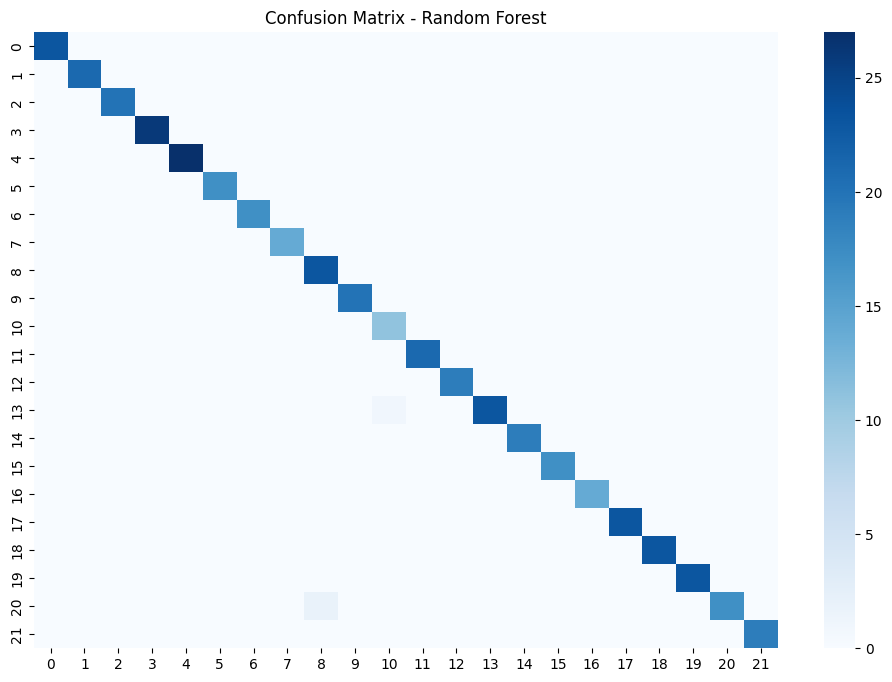

In [9]:
# Step 8: Best Model Evaluation (Random Forest)
print("\n📊 Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

C:\Users\kisho\AppData\Local\Temp\ipykernel_10012\506608056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


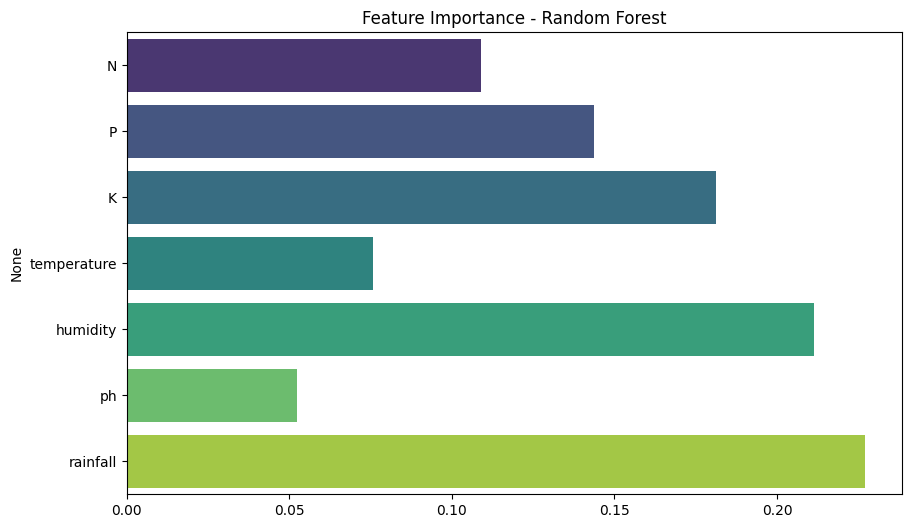

In [10]:
# Step 9: Feature Importance
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()

In [11]:
# Step 10: Test with Custom Input
sample = np.array([[90, 42, 43, 20, 82, 6.5, 202]])  # [N,P,K,temp,humidity,pH,rainfall]
pred_crop = le.inverse_transform(rf_model.predict(sample))
print("\n🌱 Recommended Crop for sample input:", pred_crop[0])


🌱 Recommended Crop for sample input: rice


C:\Users\kisho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
